In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snr

In [2]:
df = pd.read_csv('cardio_train.csv',sep=';')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
df= df.drop('id',axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df .shape

(70000, 12)

In [5]:
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [6]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

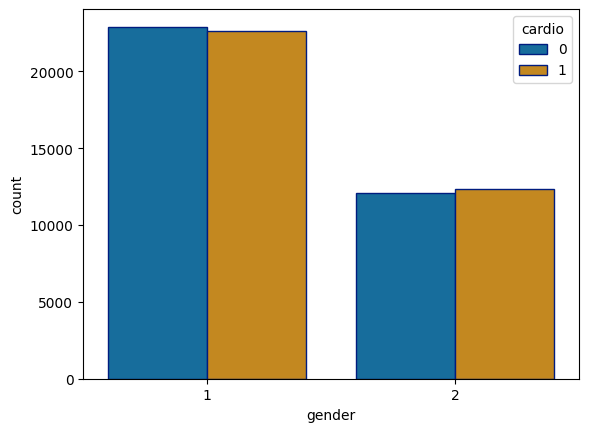

In [7]:
snr.countplot(x='gender',hue='cardio',data = df,palette='colorblind',edgecolor=snr.color_palette('dark',n_colors=1))

In [8]:
df['year']=(df['age']/365).round(0)

<Axes: xlabel='year', ylabel='count'>

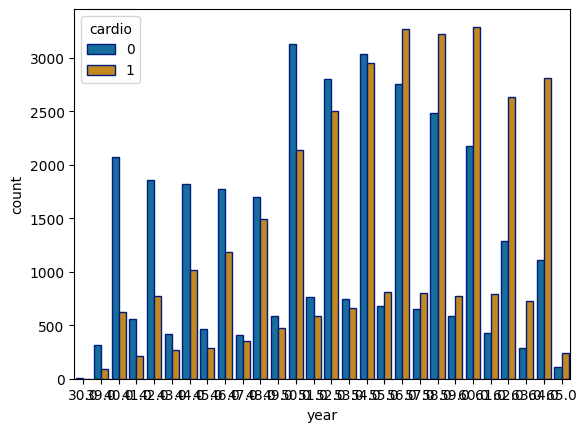

In [9]:
snr.countplot(x='year',hue='cardio',data = df,palette='colorblind',edgecolor=snr.color_palette('dark',n_colors=1))

In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,year
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


In [11]:
x = df.iloc[:,:-2]

In [12]:
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1
69996,22601,1,158,126.0,140,90,2,2,0,0,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0
69998,22431,1,163,72.0,135,80,1,2,0,0,0


In [13]:
y = df.iloc[:,12]

In [14]:
y

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: year, Length: 70000, dtype: float64

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=.30,random_state=1)

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rfc = RandomForestClassifier()

In [18]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [19]:
rfc .score(xtest,ytest)

0.9624761904761905

In [20]:
rfc.predict(xtest)

array([44., 40., 54., ..., 40., 60., 58.])

In [21]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [22]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [23]:
dtc.score(xtest,ytest)

1.0